In [3]:
# 1. Drop Constant features (using Variance Threshold)
import pandas as pd

df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,3,4,4,4], 'c' : [1,1,1,1,1], 'd': [0,0,0,0,0]})
df.head()

,a,b,c,d
0,1,2,1,0
1,2,3,1,0
2,3,4,1,0
3,4,4,1,0
4,5,4,1,0


In [4]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [14]:
var_thres.get_support()

array([ True,  True, False, False])

In [13]:
df.columns[var_thres.get_support()]

Index(['a', 'b'], dtype='object')

In [9]:
constant_col = [col for col in df.columns if col not in df.columns[var_thres.get_support()]]

In [15]:
df1 = df.drop(constant_col, axis=1)
df1.head()

,a,b
0,1,2
1,2,3
2,3,4
3,4,4
4,5,4


In [22]:
train_data_url = "datasets/santander-customer-satisfaction_train.csv"
test_data_url = "datasets/santander-customer-satisfaction_test.csv"    

from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv(train_data_url)
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [26]:
X = df.drop(['TARGET'], axis=1)
y = df['TARGET']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print(x_train.shape,"  ",x_test.shape)

(53214, 370)    (22806, 370)


In [29]:
x_train_sample = x_train.head(10000)

In [31]:
from sklearn.feature_selection import VarianceThreshold

In [32]:
vari = VarianceThreshold(threshold=0)
vari.fit(x_train_sample)

VarianceThreshold(threshold=0)

In [39]:
constant_col = [col for col in x_train_sample.columns if col not in x_train_sample.columns[vari.get_support()]]
print(len(constant_col))

65


In [41]:
print('Before removing constant columns:',x_train.shape)

Before removing constant columns: (53214, 370)


In [40]:
x_train_new = x_train.drop(constant_col,axis=1)

print('After removing constant columns:',x_train_new.shape)

After removing constant columns: (53214, 305)


# ---------------------------------------------------------------------------------

In [83]:
# Pearson Correlations:
df_corr = x_train_new.corr()

In [84]:
df_corr.shape

(305, 305)

In [85]:
corr_col = set()
threshold = 0.90
for i in range(len(df_corr.columns)):
    for j in range(i):
        if (df_corr.iloc[i,j] >= threshold) and (df_corr.columns[j] not in corr_col):
            column = df_corr.columns[i]
            corr_col.add(column)

In [86]:
len(corr_col)

141

In [87]:
df_new = x_train_new.drop(corr_col,axis=1)
df_new.shape

(53214, 164)

# ------------------------------------------------------------------------

### Mutual Information in Classification Porblem(Output/Target value is discreat)
Note: Use Discreat Target value, Given example is only for understand
I(X:Y) = H(X) - H(X|Y)  
Where I(X:Y) Mutual information for X and Y. H(X) H(X|Y) entropy.
mutual information close to 0 means, more indipendent. close to 1 menas more correlated

In [71]:
from sklearn.feature_selection import mutual_info_classif

In [89]:
mutual_info = mutual_info_classif(df_new,y_train)

In [90]:
mutual_col = pd.Series(mutual_info, index = df_new.columns)
mutual_col.sort_values(ascending=False)[:30]

ind_var30                   0.017523
num_var42                   0.016640
num_var30                   0.015516
num_var4                    0.015261
saldo_var30                 0.013519
ind_var5                    0.013324
var15                       0.012793
saldo_medio_var5_ult1       0.011415
ind_var30_0                 0.011346
ind_var5_0                  0.011259
saldo_var5                  0.011208
var36                       0.011100
saldo_medio_var5_ult3       0.011031
saldo_medio_var5_hace2      0.010822
num_meses_var39_vig_ult3    0.010604
saldo_medio_var5_hace3      0.009173
num_var30_0                 0.008937
ind_var39_0                 0.008877
num_var39_0                 0.008392
ind_var13_0                 0.002483
imp_aport_var13_hace3       0.002478
var38                       0.002131
saldo_medio_var12_hace2     0.002047
saldo_medio_var33_hace2     0.001845
saldo_var17                 0.001845
imp_aport_var17_ult1        0.001738
saldo_medio_var8_ult3       0.001720
n

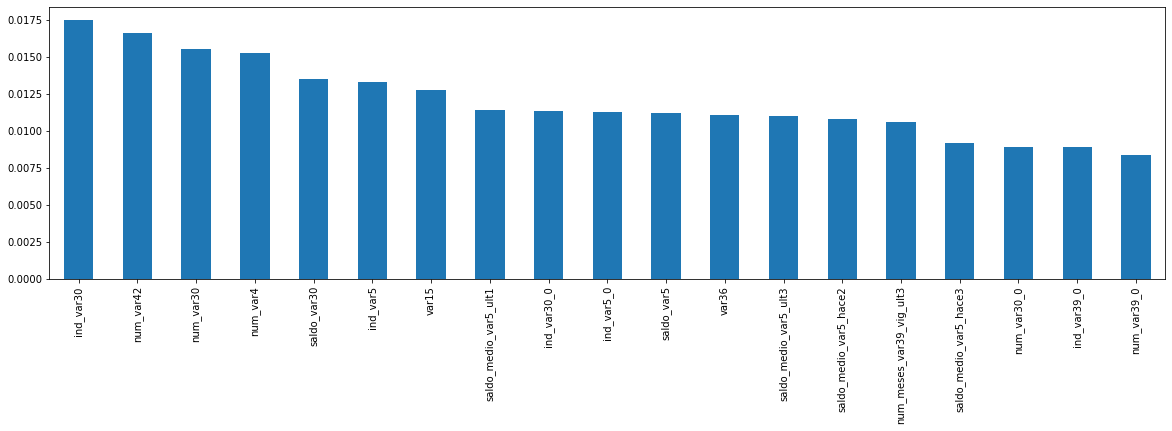

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
mutual_col.sort_values(ascending=False)[:19].plot.bar()
plt.show()

# ----------------------------------------------- SelectKBest

In [98]:
# Select K best features: (Information Gain)
from sklearn.feature_selection import SelectKBest
top_five_col = SelectKBest(mutual_info_classif, k=10)
top_five_col.fit(df_new,y_train)

SelectKBest(score_func=<function mutual_info_classif at 0x000001FC42EB99D0>)

In [105]:
df_new.columns[top_five_col.get_support()]

Index(['var15', 'ind_var5_0', 'ind_var5', 'ind_var30_0', 'ind_var30',
       'ind_var39_0', 'num_var4', 'num_var30', 'num_var42', 'saldo_var30'],
      dtype='object')

In [ ]:
# check Difference Between Information Gain and Mutual Information

### Mutual Information and Information Gain in Regression
>Estimate the mutual information for continues Target

In [101]:
from sklearn.feature_selection import mutual_info_regression
reg_info = mutual_info_regression(X,y)
reg_col = pd.Series(reg_info, index = x.columns)
reg_col.sort_values(ascending=False)
#reg_col.sort_values(ascending=False)[:20] to see top 20

In [102]:
# Select K best or Percentile Method :Both methods are same
from sklearn.feature_selection import SelectPercentile
top_ten_col = SelectPercentile(mutual_info_regression, percentile=10)
top_ten_col.fit(X,y)

In [ ]:
df.columns[top_ten_col.get_support()]

# -----------------------------------------------------------------------------------

### Chi-Square (Chi2) to select the best features. It use categorical feature to find the target class.
> It provide 2 values (F Score - Should be high | P value - Should be low ::: - for more importance of the features)

In [ ]:
df['Sex'] = np.where(df['Sex'] == 'male', 1,0)

labels = {k : i for i,k in enumerate(df['col'].unique(),0)}
df['col'] = df['col'].map(labels)

In [ ]:
from sklearn.feature_selection import chi2
# This will return 2 values: 1. F-Score, 2. p-Value
f_p_value = Chi2(X,y)

In [ ]:
p_val = pd.Serise(f_p_value[1], index= x.columns)
p_val.sort_values(ascending=False)


# ----------------------------------------------------------------------------

In [ ]:
## Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
print(selection.feature_importances_)

In [ ]:
imp_col = pd.Series(selection.feature_importances_,X.columns)
imp_col.sort_values(ascending=False)